<a href="https://colab.research.google.com/github/AMIT110409/Mobile-Phone-data-project-/blob/main/mobile_phone_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [8]:
data = pd.read_csv('Mobile.csv')

In [12]:
# Display the first five rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    984 non-null    object 
 1   camera     984 non-null    object 
 2   display    984 non-null    object 
 3   memory     984 non-null    object 
 4   name       984 non-null    object 
 5   price      984 non-null    int64  
 6   processor  983 non-null    object 
 7   rating     971 non-null    float64
 8   reviews    971 non-null    object 
 9   warranty   836 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 77.0+ KB


In [13]:
data.head(5)

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
0,5000 mAh Battery,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,"55,078 Reviews",Brand Warranty of 1 Year Available for Mobile ...
1,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,"20,062 Reviews",Sunrise Design
2,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
3,5000 mAh Battery,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,"20,062 Reviews",Sunrise Design
4,4000 mAh Battery,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,"10,091 Reviews",Dual Nano SIM slots and Memory Card Slot


In [15]:
# Assuming you have a DataFrame named 'data'
missing_values = data.isnull().sum()
missing_values
 # Display the count of missing values for each column

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,1
rating,13
reviews,13
warranty,148


In [16]:
# now we perform   the data cleaning after getting result from above of missing value and numberic and non numberic .

# Data Cleaning

# Extract numeric values from battery, camera, display, memory, and reviews columns
data['battery_capacity'] = data['battery'].str.extract('(\d+)').astype(float)          # here \d+ means  looking for any sequence of digits it is regular expression

# For camera, extracting the number of cameras in the phone (ignoring pixel resolution)
data['camera_count'] = data['camera'].apply(lambda x: len(x.split('|')[0].split('+')))

# Extract display size in inches
data['display_size'] = data['display'].str.extract('(\d+\.?\d*)').astype(float)

# Extract RAM and ROM from memory column
data['ram'] = data['memory'].str.extract('(\d+)\s*GB\s*RAM').astype(float)
data['rom'] = data['memory'].str.extract('(\d+)\s*GB\s*ROM').astype(float)

# Extract number of reviews
data['num_reviews'] = data['reviews'].str.extract('(\d+,?\d*)').replace(',', '', regex=True).astype(float)

# Handle missing values in rating by imputing the mean
data['rating'].fillna(data['rating'].mean(), inplace=True)

# Drop columns that are not useful for analysis
data_cleaned = data.drop(['battery', 'camera', 'display', 'memory', 'name', 'processor', 'warranty', 'reviews'], axis=1)

# Check the cleaned data
data_cleaned.head(), data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             984 non-null    int64  
 1   rating            984 non-null    float64
 2   battery_capacity  984 non-null    float64
 3   camera_count      984 non-null    int64  
 4   display_size      984 non-null    float64
 5   ram               968 non-null    float64
 6   rom               979 non-null    float64
 7   num_reviews       971 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 61.6 KB


(   price  rating  battery_capacity  camera_count  display_size  ram    rom  \
 0   9999     4.4            5000.0             2         15.80  4.0   64.0   
 1  10999     4.5            5000.0             4         16.56  4.0   64.0   
 2  11999     4.5            5000.0             4         16.56  4.0  128.0   
 3  11999     4.5            5000.0             4         16.56  4.0  128.0   
 4   7499     4.4            4000.0             2         15.49  3.0   32.0   
 
    num_reviews  
 0      55078.0  
 1      20062.0  
 2      20062.0  
 3      20062.0  
 4      10091.0  ,
 None)

In [17]:
data_cleaned.head()

,price,rating,battery_capacity,camera_count,display_size,ram,rom,num_reviews
0,9999,4.4,5000.0,2,15.80,4.0,64.0,55078.0
1,10999,4.5,5000.0,4,16.56,4.0,64.0,20062.0
2,11999,4.5,5000.0,4,16.56,4.0,128.0,20062.0
3,11999,4.5,5000.0,4,16.56,4.0,128.0,20062.0
4,7499,4.4,4000.0,2,15.49,3.0,32.0,10091.0


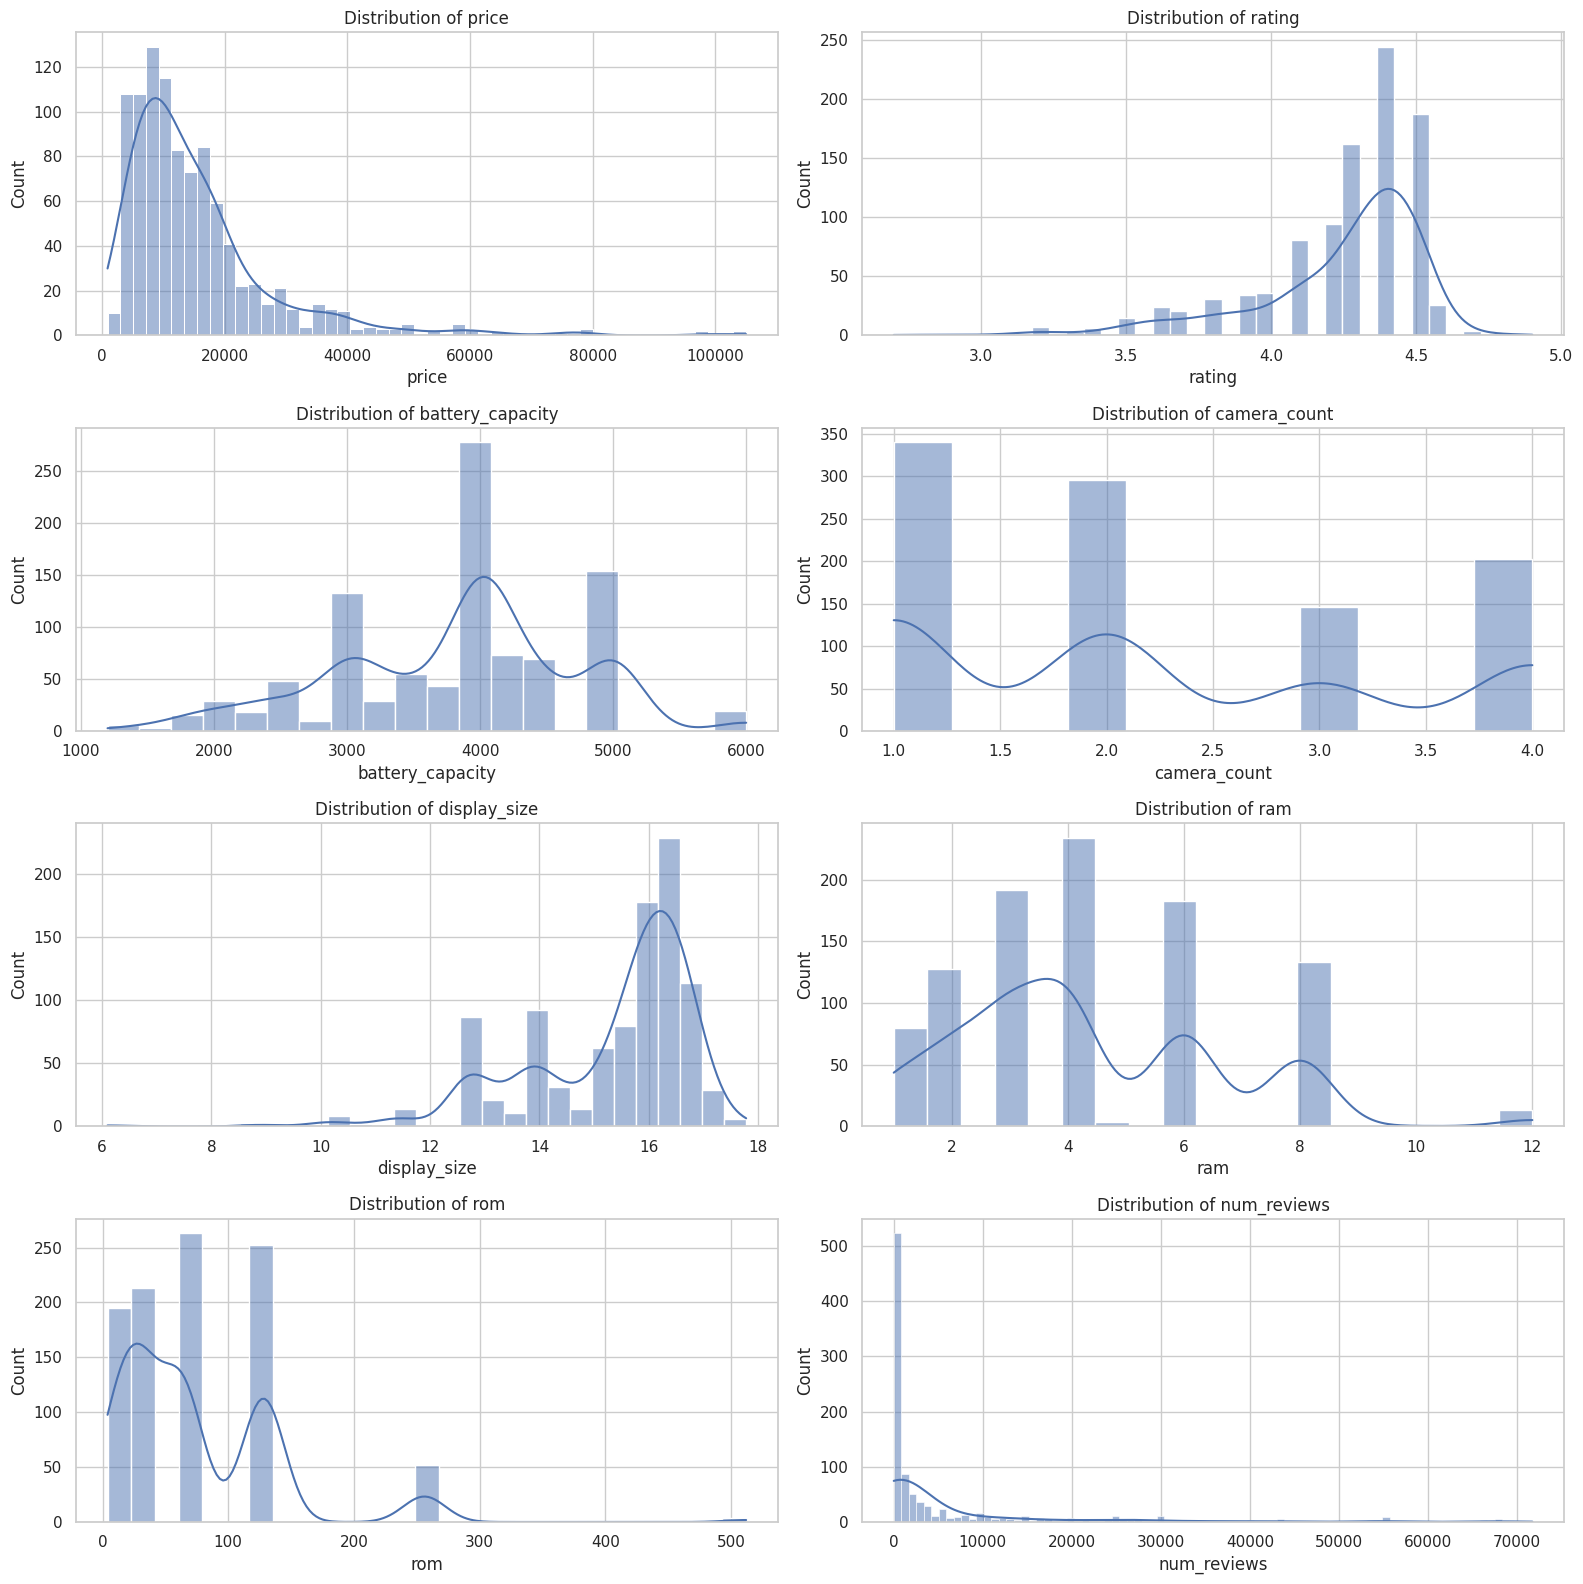

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Univariate Analysis
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
axes = axes.flatten()

# Plotting histograms for each numeric column
columns = ['price', 'rating', 'battery_capacity', 'camera_count', 'display_size', 'ram', 'rom', 'num_reviews']
for i, col in enumerate(columns):
    sns.histplot(data_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


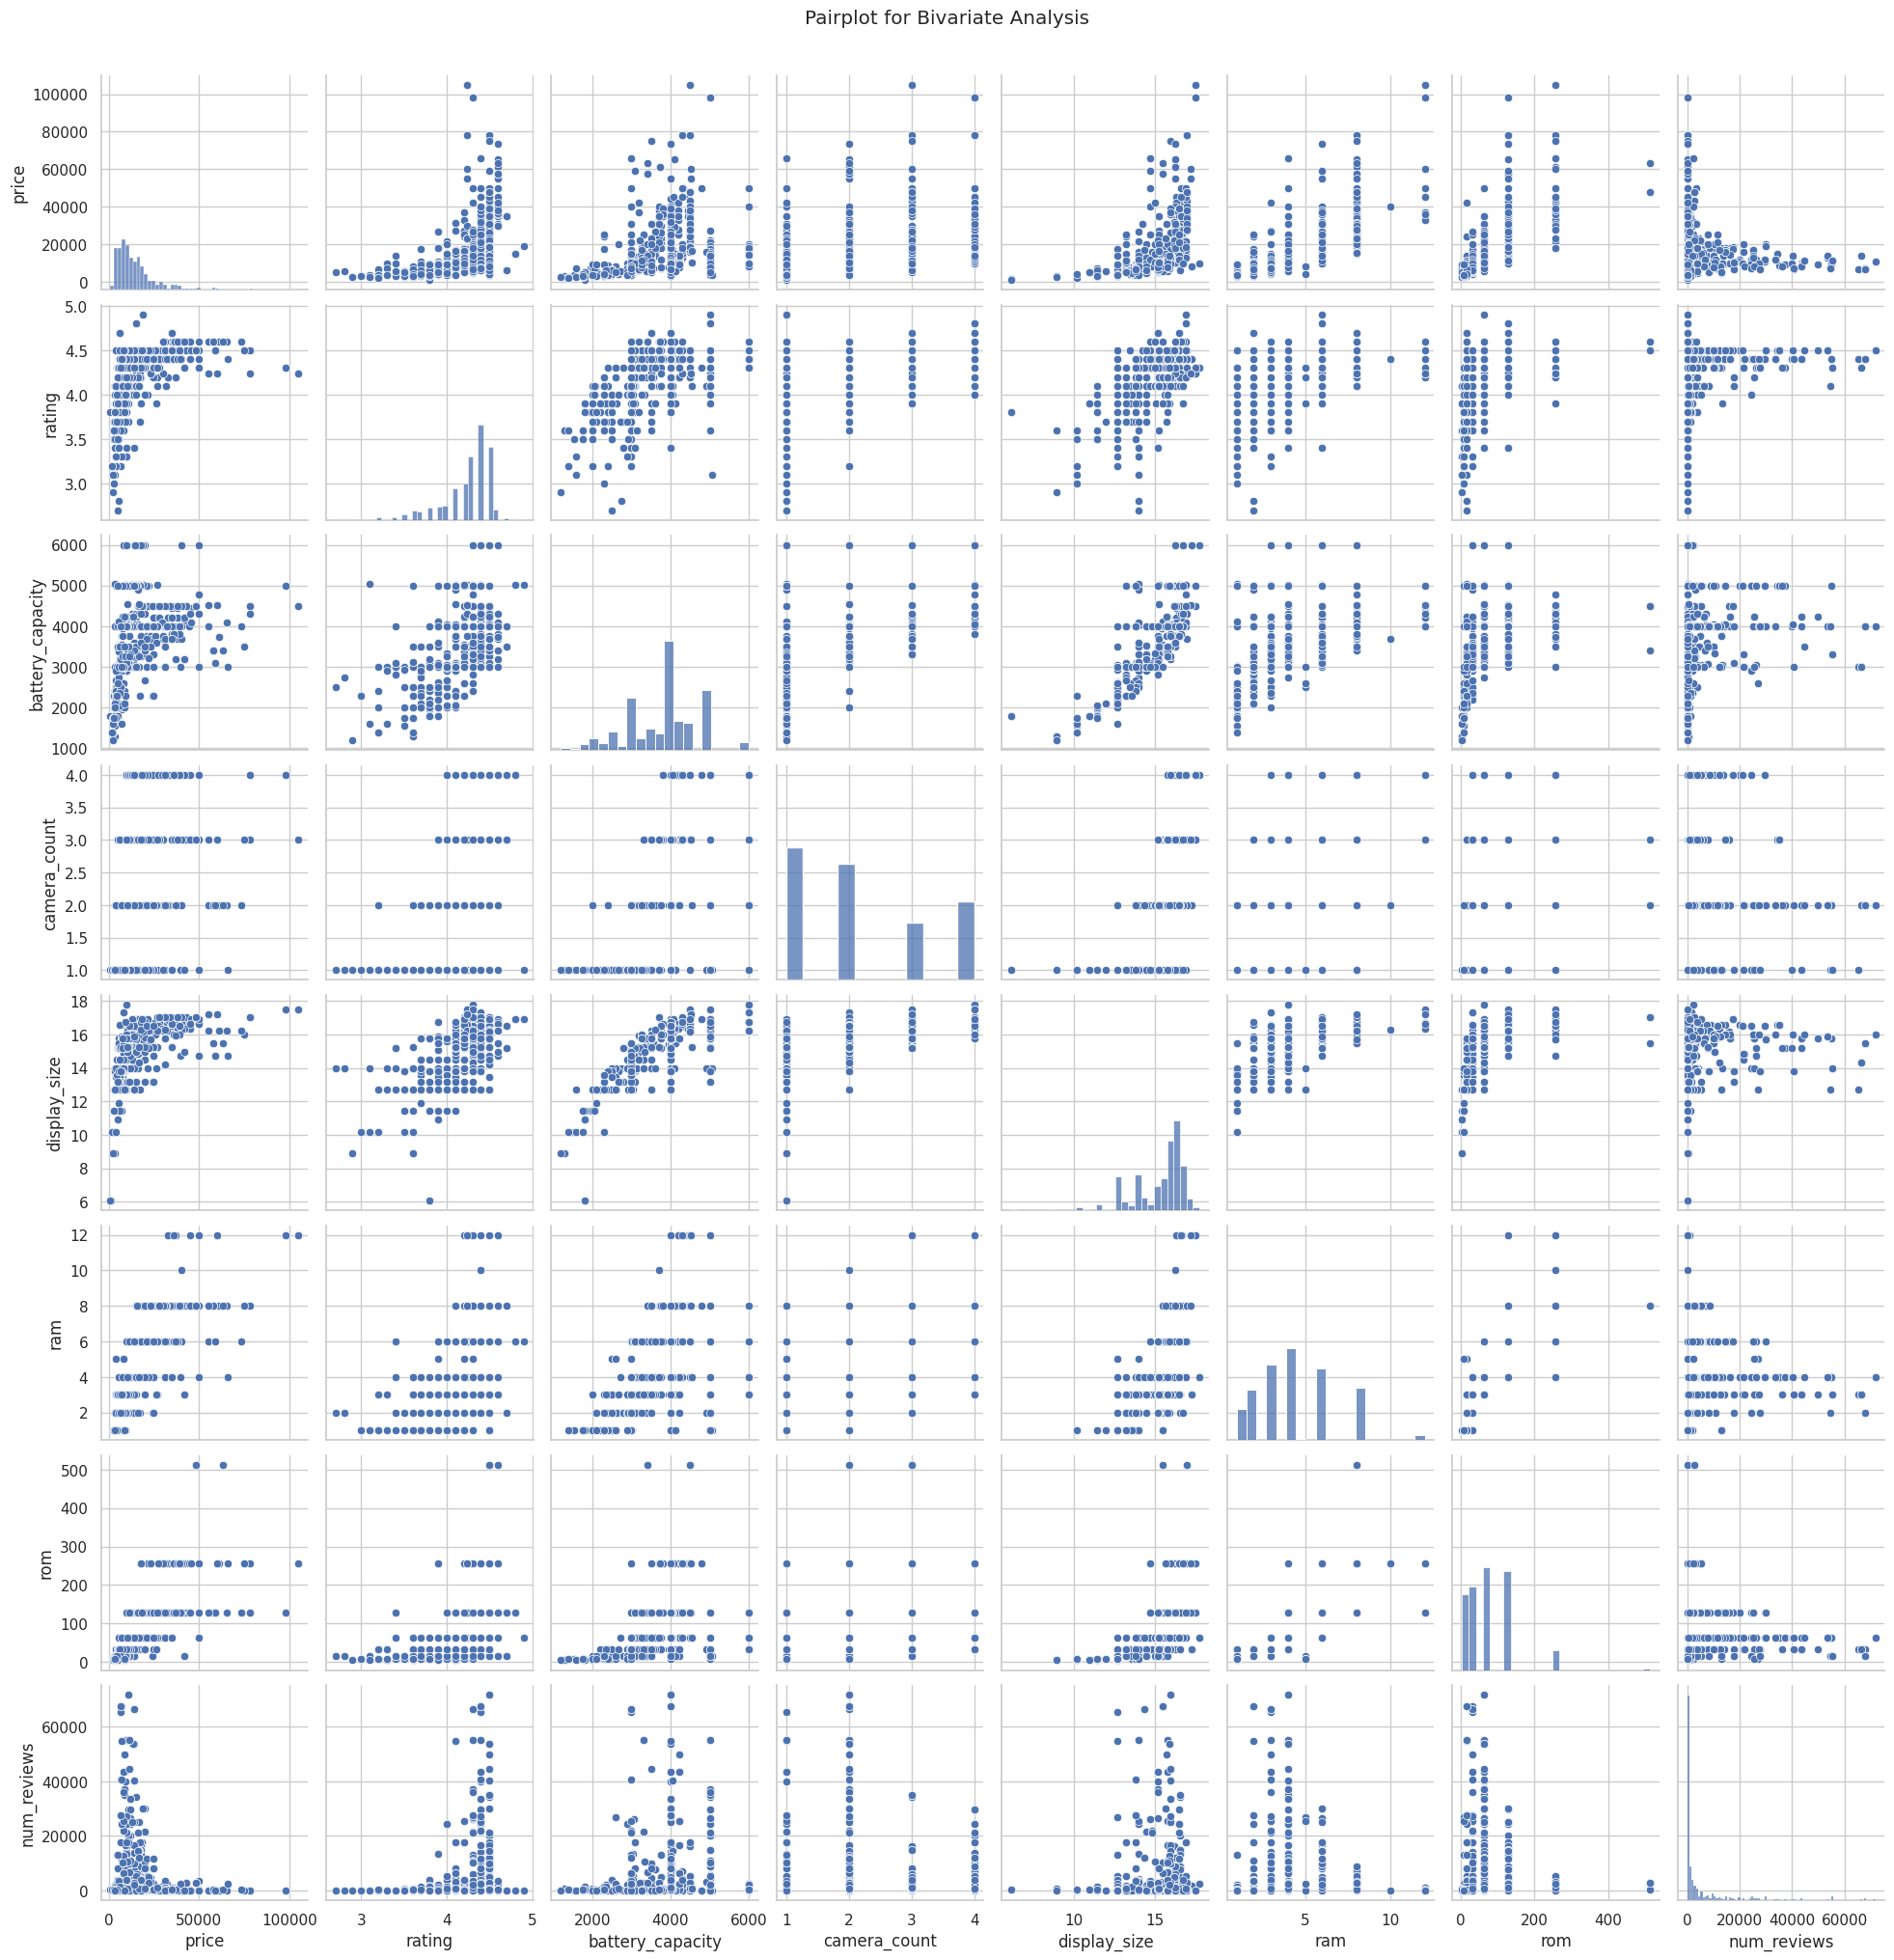

In [20]:
# Bivariate Analysis

# Plotting pairplot to explore relationships between key variables
sns.pairplot(data_cleaned[['price', 'rating', 'battery_capacity', 'camera_count', 'display_size', 'ram', 'rom', 'num_reviews']])
plt.suptitle("Pairplot for Bivariate Analysis", y=1.02)
plt.show()



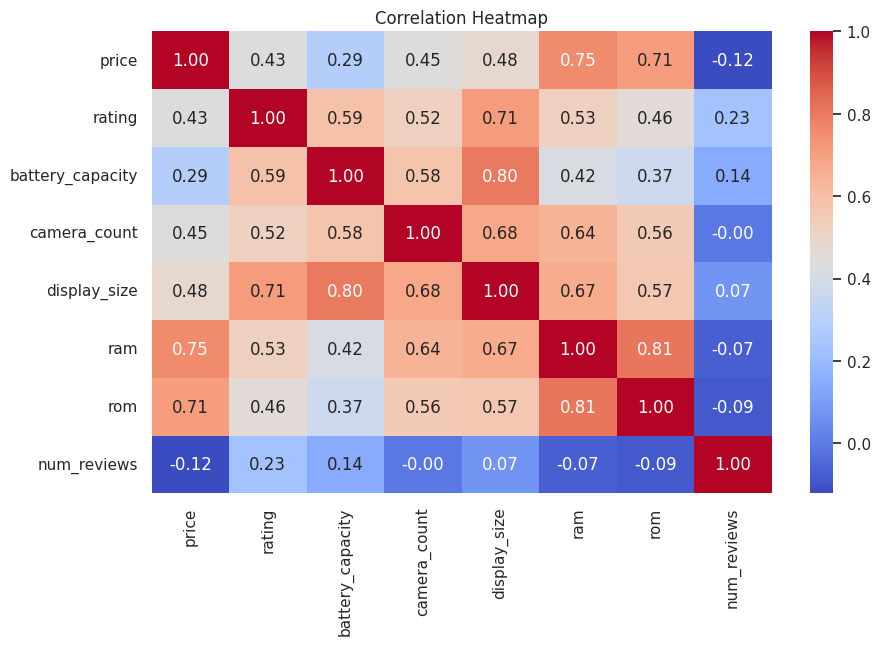

In [21]:
# Correlation heatmap to quantify relationships
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


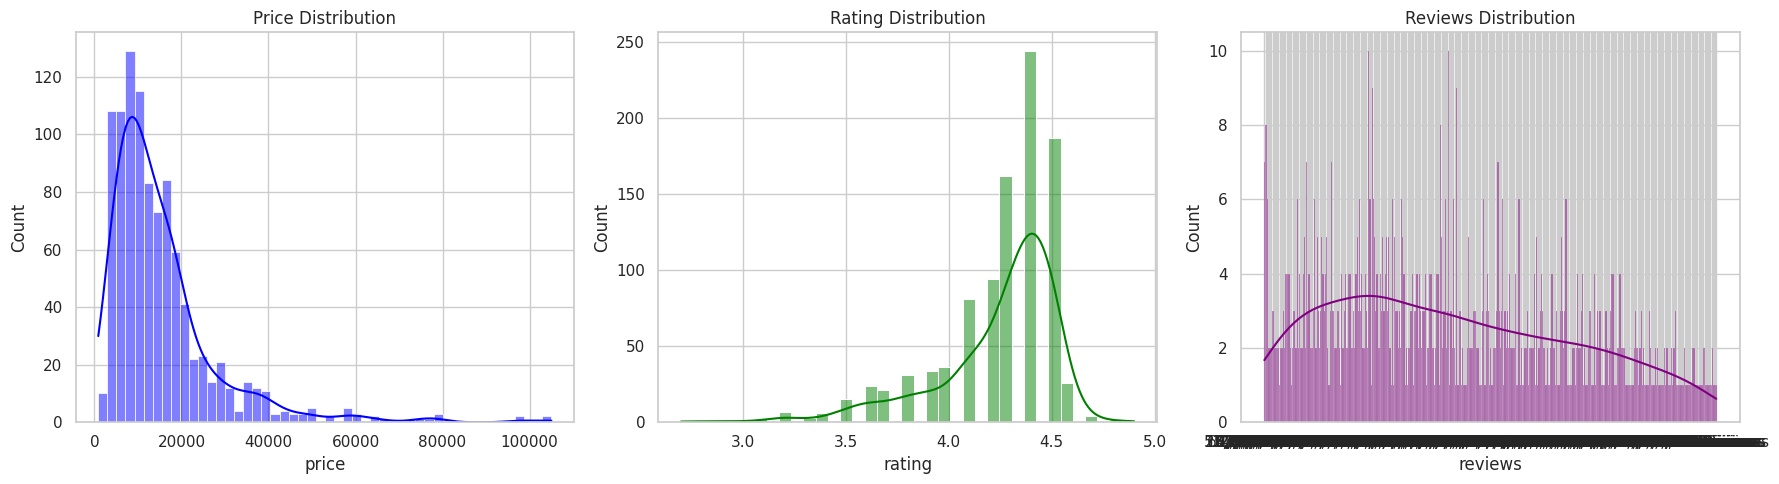

In [28]:
# Univariate Analysis: Plotting distributions of numerical columns (price, rating, reviews)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Price Distribution
sns.histplot(data['price'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Price Distribution')

# Rating Distribution
sns.histplot(data['rating'].dropna(), kde=True, ax=axes[1], color='green')
axes[1].set_title('Rating Distribution')

# Reviews Distribution
sns.histplot(data['reviews'].dropna(), kde=True, ax=axes[2], color='purple')
axes[2].set_title('Reviews Distribution')


plt.tight_layout()
plt.show()


In [36]:

# Checking unique values in object columns to understand their distributions

battery_unique = data_cleaned['battery_capacity'].nunique()
camera_unique = data_cleaned['camera_count'].nunique()
display_unique = data_cleaned['display_size'].nunique()
# memory_unique = data_cleaned['memory'].nunique()
# processor_unique = data_cleaned['processor'].nunique()
# warranty_unique = data_cleaned['warranty'].nunique()

battery_unique, camera_unique, display_unique

(84, 4, 57)

In [38]:
battery_unique = data['battery'].nunique()                  # before clean  data  we have
camera_unique = data['camera'].nunique()
display_unique = data['display'].nunique()
memory_unique = data['memory'].nunique()
processor_unique = data['processor'].nunique()
warranty_unique = data['warranty'].nunique()

battery_unique, camera_unique, display_unique, memory_unique, processor_unique, warranty_unique

(177, 185, 125, 89, 287, 92)

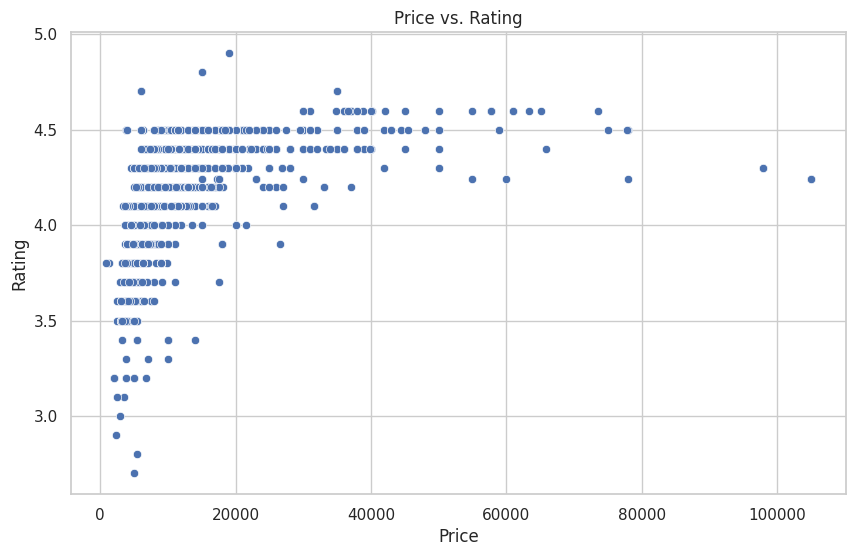

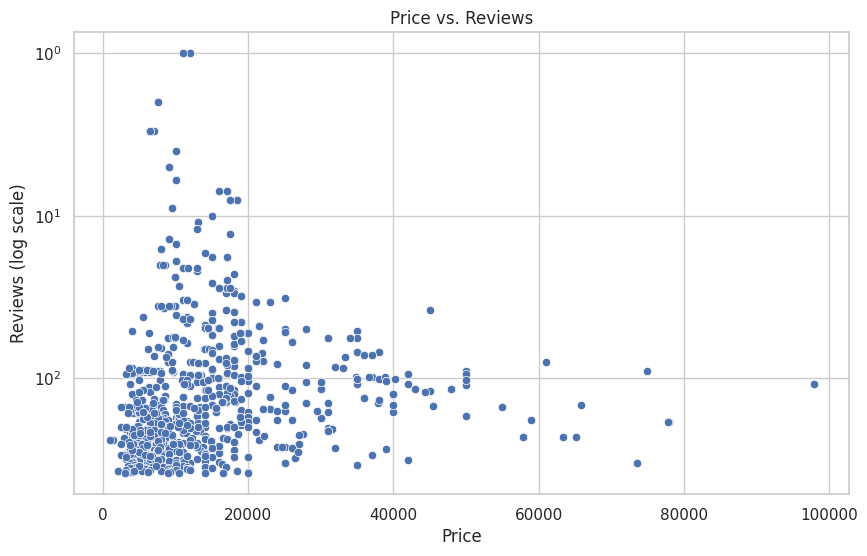

In [41]:
# Bivariate Analysis: Price vs. Rating and Price vs. other factors

# Scatter plot of Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=data_cleaned)
plt.title('Price vs. Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Price vs Reviews (log scale due to wide range)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=data)
plt.yscale('log')
plt.title('Price vs. Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews (log scale)')
plt.show()

# Analyze th

In [43]:
# Analyze the impact of other factors (battery, camera, memory) on price
# Aggregating price by battery, camera, and memory
battery_price = data_cleaned.groupby('battery_capacity')['price'].mean().sort_values()
camera_price = data_cleaned.groupby('camera_count')['price'].mean().sort_values()
memory_price = data.groupby('memory')['price'].mean().sort_values()

battery_price, camera_price, memory_price


#battery_capacity,	camera_count

(battery_capacity
 1400.0     2165.666667
 1200.0     2399.000000
 1300.0     3015.500000
 1750.0     3115.666667
 1800.0     3151.666667
               ...     
 4085.0    45470.000000
 4780.0    49990.000000
 4315.0    49990.000000
 4510.0    57494.500000
 3730.0    60990.000000
 Name: price, Length: 84, dtype: float64,
 camera_count
 1     8547.685294
 2    14624.577703
 4    22642.084158
 3    23110.835616
 Name: price, dtype: float64,
 memory
 32 MB RAM | 32 MB ROM | Expandable Upto 32 GB        1092.500000
 256 MB RAM | 512 MB ROM | Expandable Upto 32 GB      1999.000000
 512 MB RAM | 4 GB ROM                                2399.000000
 512 MB RAM | 8 GB ROM                                2849.000000
 512 MB RAM | 8 GB ROM | Expandable Upto 32 GB        3574.000000
                                                        ...      
 8 GB RAM | 128 GB ROM | Expandable Upto 1 TB        53654.555556
 8 GB RAM | 512 GB ROM | Expandable Upto 512 GB      63400.000000
 4 GB RAM | 256 GB R

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform your data cleaning steps here
# Example: data_cleaned = data.dropna() or any other cleaning process
data_cleaned = data.dropna()  # Replace this with your actual cleaning steps

# Ensure the 'rating' column is included
if 'rating' not in data_cleaned.columns:
    data_cleaned['rating'] = data['rating']

# Proceed with the predictive modeling and clustering as before
df_prediction = data_cleaned.dropna(subset=['rating'])

# Encoding categorical features
le = LabelEncoder()
for column in ['battery_capacity', 'camera_count', 'display_size', 'ram', 'rom']:
    df_prediction[column] = le.fit_transform(df_prediction[column].astype(str))

# Splitting the data into train and test sets
X = df_prediction.drop(columns=['rating', 'price'])  # Excluding 'price' and 'rating' from features
y = df_prediction['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestRegressor for predicting rating
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Clustering Phones (using the entire dataset, excluding missing values)
X_clustering = df_prediction.drop(columns=['rating', 'price'])

# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the dataframe
df_prediction['cluster'] = clusters

# Output the performance metrics and the first few rows of the clustered data
mse, r2, df_prediction[['price', 'cluster']].head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.010912041884816754,
 0.8544702054544125,
    price  cluster
 0   9999        3
 1  10999        4
 2  11999        4
 3  11999        4
 4   7499        2)

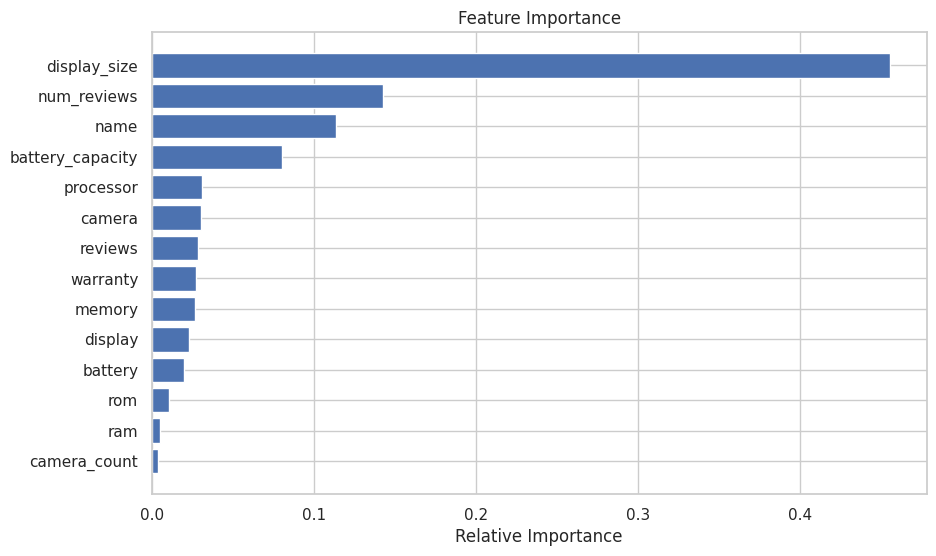

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from the RandomForestRegressor
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


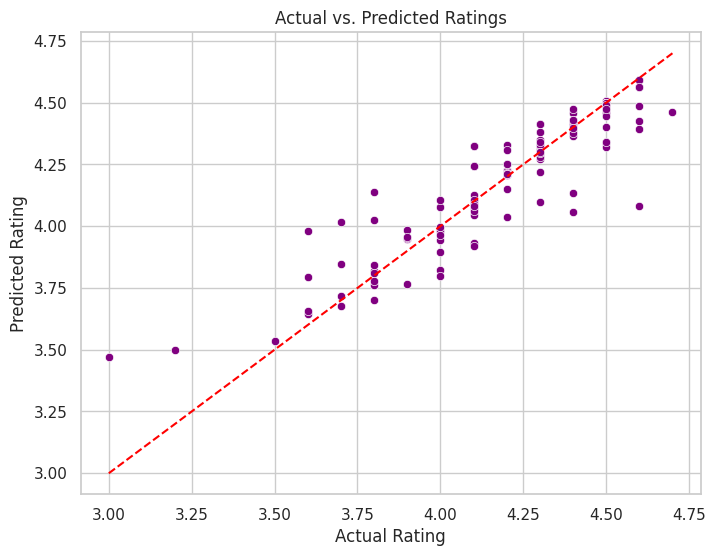

In [57]:
# Scatter plot of Actual vs. Predicted Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


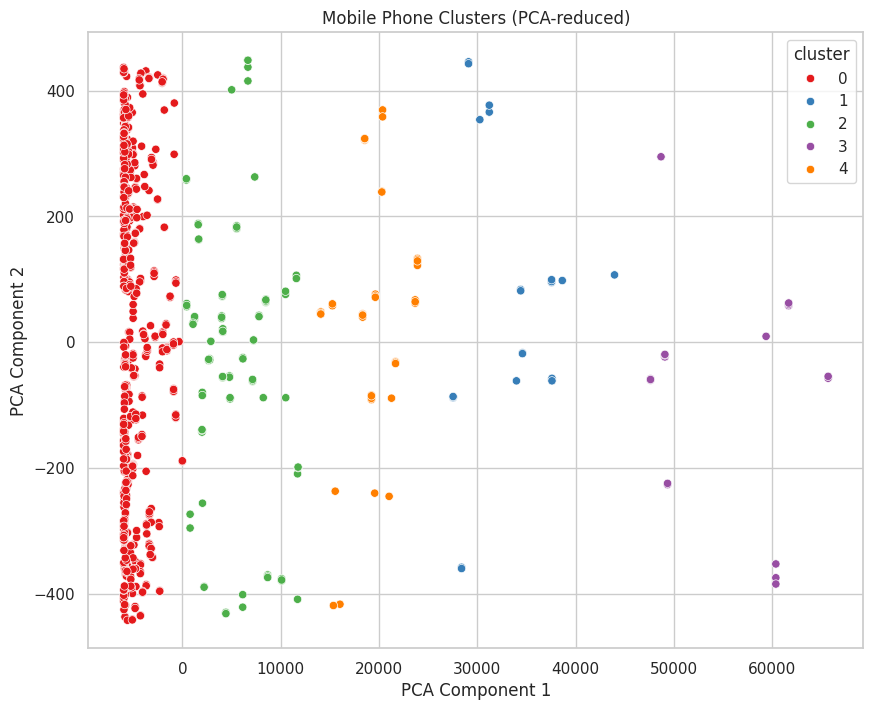

In [58]:
# Plotting the clusters in the 2D PCA-transformed space
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_prediction['cluster'], palette='Set1')
plt.title('Mobile Phone Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
